In [1]:
from model import *
from data import *
import cv2

Using TensorFlow backend.


In [2]:
model_checkpoint = ModelCheckpoint('unet_weights100.hdf5', monitor='loss',verbose=1, save_best_only=True)
model = unet(pretrained_weights='unet_weights100.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

## Train dengan npy file

In [4]:
imgs_train, imgs_mask_train = geneTrainNpy("data/train/aug/","data/train/aug/")
unettraining = model.fit(imgs_train, imgs_mask_train, batch_size = 5, epochs = 500, verbose = 1, validation_split= 10/1200, shuffle = True, callbacks = [model_checkpoint])

Train on 1190 samples, validate on 10 samples
Epoch 1/1000
1190/1190 [==============================] - 527s 443ms/step - loss: 0.0378 - accuracy: 0.9873 - val_loss: 0.0641 - val_accuracy: 0.9878

Epoch 00001: loss improved from inf to 0.03784, saving model to unet_weights.hdf5
Epoch 2/1000
1190/1190 [==============================] - 512s 431ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0049 - val_accuracy: 0.9978

Epoch 00002: loss improved from 0.03784 to 0.01016, saving model to unet_weights.hdf5
Epoch 3/1000
1190/1190 [==============================] - 513s 431ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0034 - val_accuracy: 0.9989

Epoch 00003: loss improved from 0.01016 to 0.00641, saving model to unet_weights.hdf5
Epoch 4/1000
1190/1190 [==============================] - 513s 431ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0072 - val_accuracy: 0.9965

Epoch 00004: loss did not improve from 0.00641
Epoch 5/1000
1190/1190 [=========================

KeyboardInterrupt: 

## History Plot After Training

In [6]:
import matplotlib.pyplot as plt 

# Plot training & validation accuracy values
plt.plot(unettraining.history['accuracy'])
plt.plot(unettraining.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(unettraining.history['loss'])
plt.plot(unettraining.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'unettraining' is not defined

## Writing Training History to Txt

In [6]:
acc = open("acc.txt", "w+")
acc.write(str(unettraining.history['accuracy']))
acc.close()
val_acc = open("val_acc.txt", "w+")
val_acc.write(str(unettraining.history['val_accuracy']))
val_acc.close()
loss = open("loss.txt", "w+")
loss.write(str(unettraining.history['loss']))
loss.close()
val_loss =open("val_loss.txt", "w+")
val_loss.write(str(unettraining.history['val_loss']))
val_loss.close()

## Read Training History from Txt

In [7]:
def convert2list(file):
    file_list = file.read()
    file_c = file_list[1:-1]
    file_c = list(file_c.split(','))
    for i in range(0, len(file_c)): 
        file_c[i] = float(file_c[i])
    return file_c

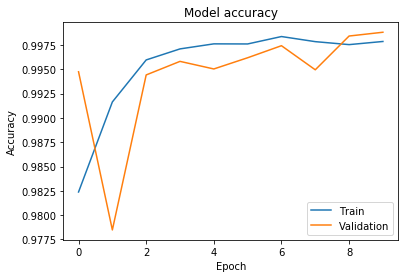

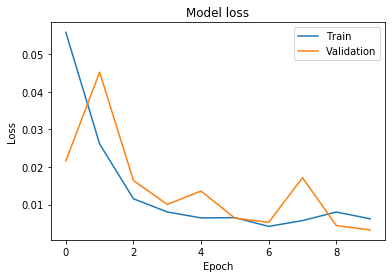

In [8]:
acc = convert2list(open("./monitor/acc10.txt", "r"))
val_acc = convert2list(open("./monitor/val_acc10.txt", "r"))
loss = convert2list(open("./monitor/loss10.txt", "r"))
val_loss = convert2list(open("./monitor/val_loss10.txt", "r"))

import matplotlib.pyplot as plt 

# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Simpan Data Prediksi

In [8]:
def saveResult(save_path, npyfile, flag_multi_class = False, num_class = 1):
    for i, item in enumerate(npyfile):
        img = labelVisualize(num_class, COLOR_DICT, item) if flag_multi_class else item[:,:,0]
        print(img.shape)
        #img = trans.resize(img, (432,532)) # Gambar USG TA
        img = trans.resize(img, (512,470)) # Gambar USG Phantom
        io.imsave(os.path.join(save_path,"%d_predict.png"%i), img, check_contrast=False)

In [10]:
#testGene = testGenerator('data/test') #Data GE
testGene = testGenerator('data/test-phantom') #Data Phantom
results = model.predict_generator(testGene,167,verbose=1, callbacks = [model_checkpoint])#cv2.normalize(src= model.predict_generator(testGene,237,verbose=1, callbacks = [model_checkpoint]), dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#saveResult('data/test', results) #Data GE
saveResult('data/test-phantom', results) #Data Phantom

FileNotFoundError: No such file: 'd:\DATA\Institut Teknologi Sepuluh Nopember\MATERI\SEMESTER VIII\Tugas Akhir\GitRepo\data\test-phantom\167.png'